In [33]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [34]:
df = pd.read_csv('tesladata.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500


In [35]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3740 entries, 0 to 3739
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3740 non-null   object 
 1   Open    3740 non-null   float64
 2   High    3740 non-null   float64
 3   Low     3740 non-null   float64
 4   Close   3740 non-null   float64
 5   Volume  3740 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 175.4+ KB


In [37]:
df.describe()

,Open,High,Low,Close,Volume
count,3740.000000,3740.000000,3740.000000,3740.000000,3.740000e+03
mean,86.949267,88.899611,84.861989,86.926722,9.692899e+07
std,112.422898,114.994359,109.592483,112.332623,7.706058e+07
min,1.076000,1.108667,0.998667,1.053333,1.777500e+06
25%,12.363500,12.629333,12.140333,12.381667,4.983652e+07
50%,18.590666,18.955000,18.336666,18.649334,8.279025e+07
75%,187.037498,191.802498,182.967499,188.132504,1.225148e+08
max,475.899994,488.540009,457.510010,479.859985,9.140820e+08


<Axes: title={'center': 'Tesla Stock Price'}, xlabel='Date'>

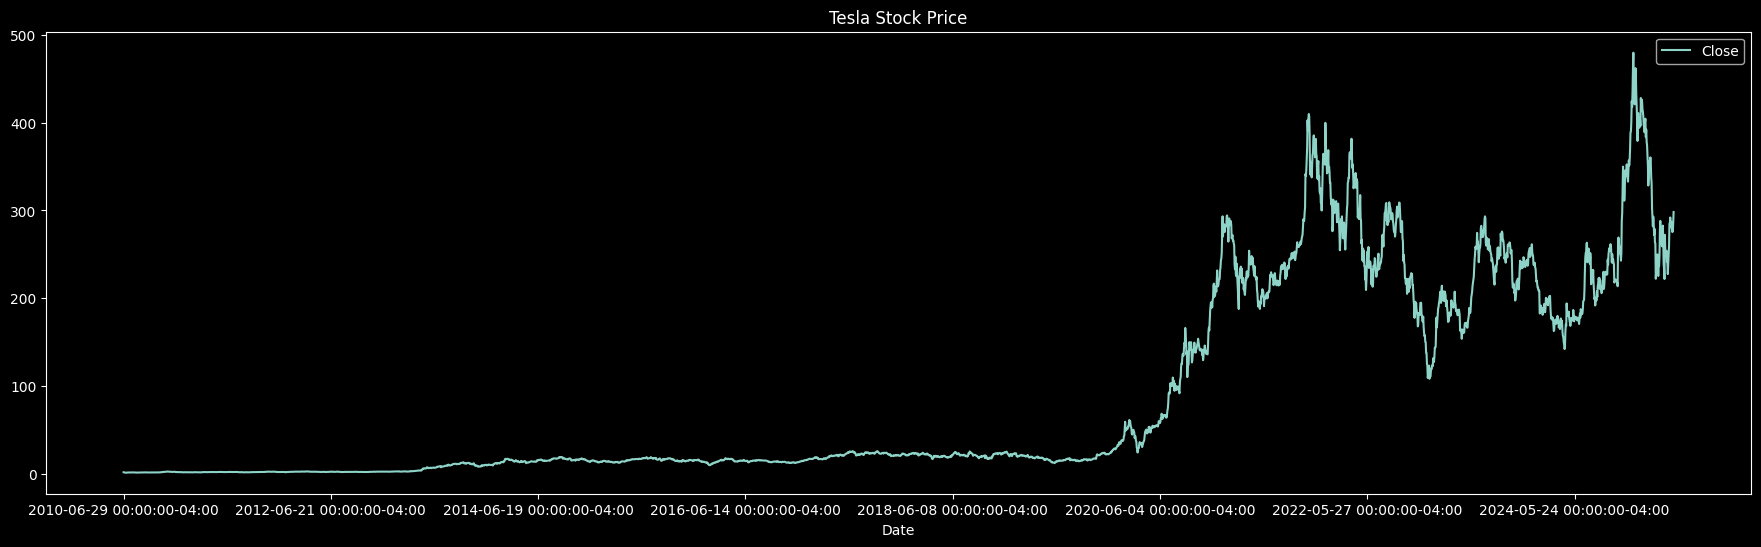

In [38]:
df.plot(x='Date', y='Close', kind='line', title='Tesla Stock Price', figsize=(22, 6))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

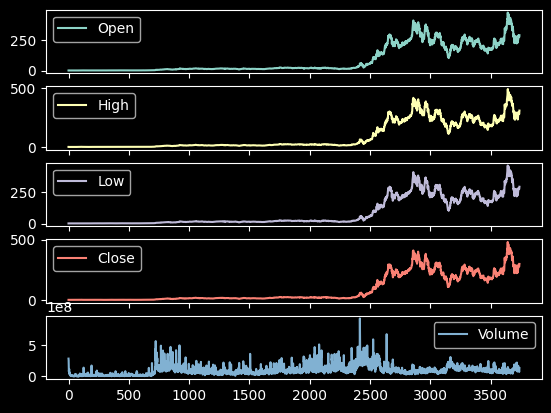

In [39]:
df.plot(subplots=True)

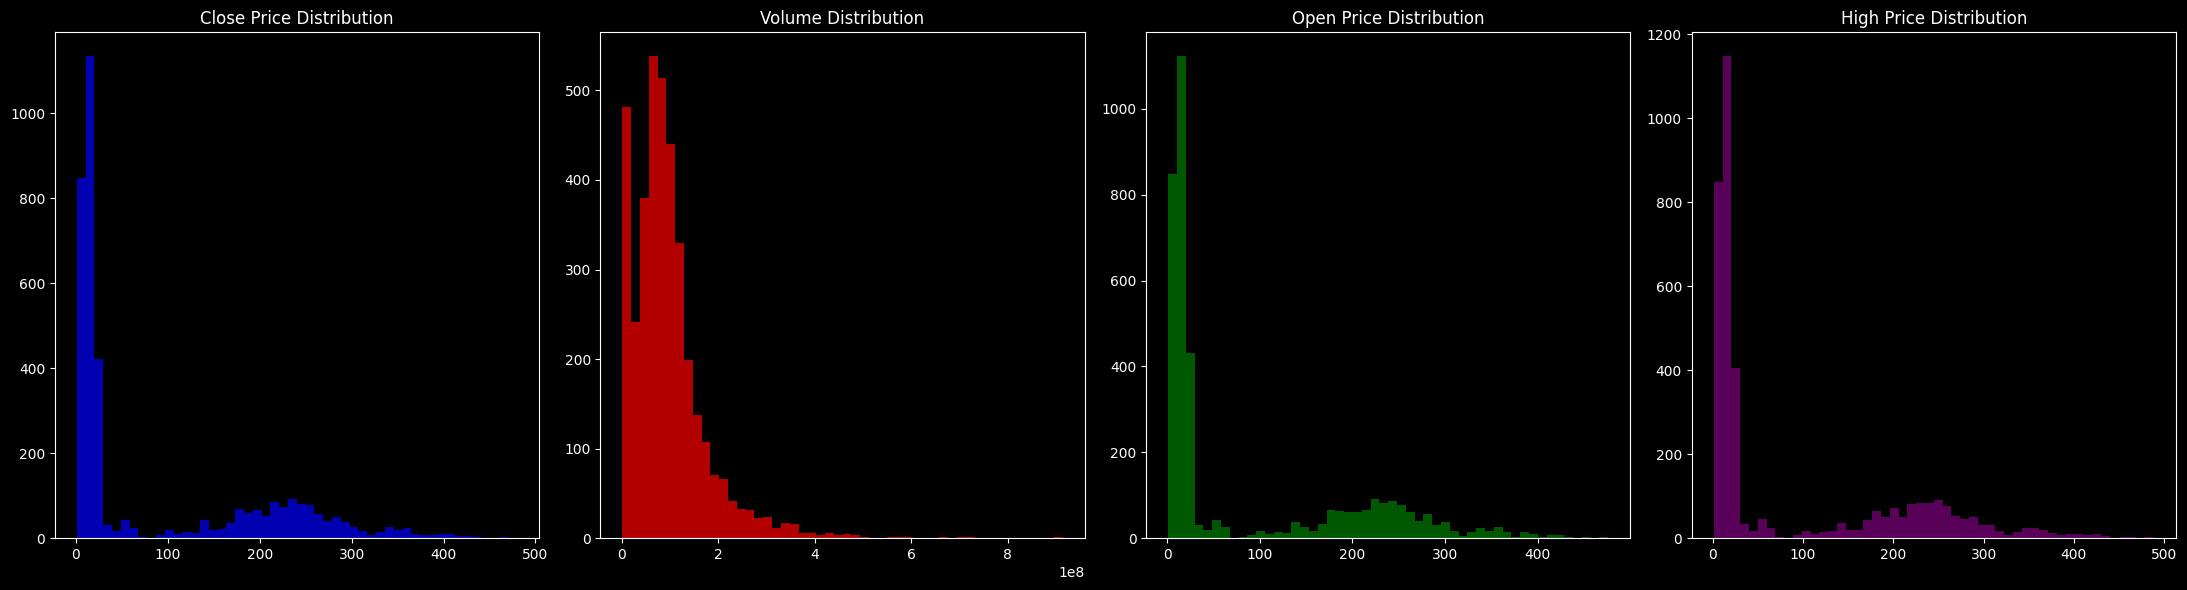

In [40]:
plt.figure(figsize=(22, 6))

plt.subplot(1,4,1)
plt.hist(df['Close'], bins=50, color='blue', alpha=0.7)
plt.title('Close Price Distribution')

plt.subplot(1,4,2)
plt.hist(df['Volume'], bins=50, color='red', alpha=0.7)
plt.title('Volume Distribution')

plt.subplot(1,4,3)
plt.hist(df['Open'], bins=50, color='green', alpha=0.7)
plt.title('Open Price Distribution')

plt.subplot(1,4,4)
plt.hist(df['High'], bins=50, color='purple', alpha=0.7)
plt.title('High Price Distribution')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'High Price Boxplot')

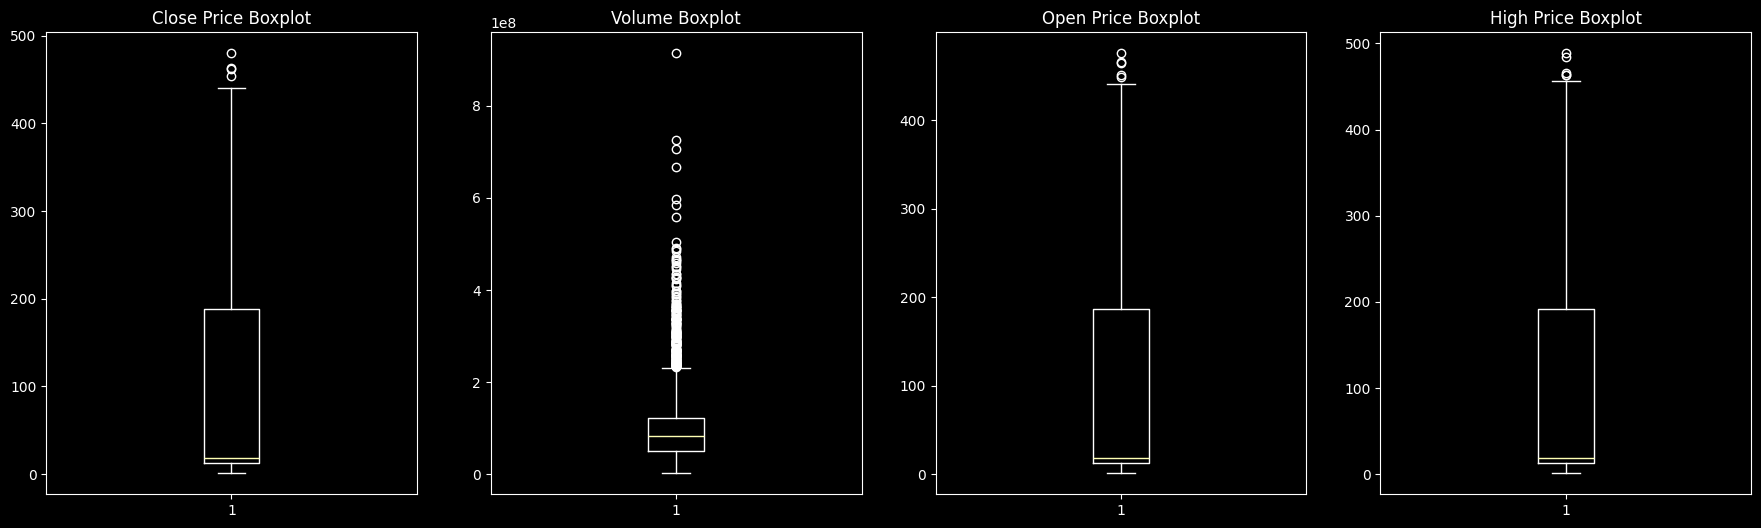

In [41]:
plt.figure(figsize=(22, 6))

plt.subplot(1,4,1)
plt.boxplot(df['Close'])
plt.title('Close Price Boxplot')

plt.subplot(1,4,2)
plt.boxplot(df['Volume'])
plt.title('Volume Boxplot')

plt.subplot(1,4,3)
plt.boxplot(df['Open'])
plt.title('Open Price Boxplot')  

plt.subplot(1,4,4)
plt.boxplot(df['High'])
plt.title('High Price Boxplot')

In [42]:
scaler = MinMaxScaler(feature_range=(0, 1))
df['Close'] = scaler.fit_transform(df[['Close']])

In [43]:
def sequence_data(data,k):  # p is position of split, k is window size
    X=[]
    y=[]
    for i in range(k,len(data)):
        X.append(data[i-k:i])
        y.append(data[i])
    return np.array(X), np.array(y)


In [44]:
k = 30
p = int(len(df)*0.8)
X,y = sequence_data(df['Close'].values,k)

In [45]:
X_train, X_test = X[:p], X[p:]
y_train, y_test = y[:p], y[p:]

In [46]:
print(X_train.shape,X_test.shape)

(2992, 30) (718, 30)


In [47]:
print(y_train.shape,y_test.shape)

(2992,) (718,)


In [48]:
X_train.shape[1]

30

In [65]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

c:\Users\RAJ\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [66]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [68]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 30, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [70]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0142 - val_loss: 0.0024
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 9.7987e-04 - val_loss: 0.0022
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.1061e-04 - val_loss: 0.0026
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 8.1870e-04 - val_loss: 0.0018
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.9900e-04 - val_loss: 0.0018
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.2560e-04 - val_loss: 0.0015
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.8037e-04 - val_loss: 0.0016
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.6298e-04 - val_loss: 0.0019
Epoch 9/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.0580e-04 - val_loss: 0.0015
Epoch 10/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.5841e-04 - val_loss: 0.0014
Epoch 11/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.9017e-04 - val_loss: 0.0018
Epoch 12/30
94/94 ━━━━━

In [71]:
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013   
Test Loss: 0.0014674959238618612


In [72]:
pred_price = model.predict(X_test)
print(pred_price)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[[0.52532357]
 [0.5170215 ]
 [0.50971055]
 [0.50682056]
 [0.5060496 ]
 [0.51227444]
 [0.52333915]
 [0.5271162 ]
 [0.5263074 ]
 [0.5250889 ]
 [0.52434766]
 [0.5247586 ]
 [0.5258555 ]
 [0.5293095 ]
 [0.53402746]
 [0.54941976]
 [0.5667254 ]
 [0.5796259 ]
 [0.5832159 ]
 [0.58903396]
 [0.5970218 ]
 [0.611922  ]
 [0.62666833]
 [0.6397523 ]
 [0.65229416]
 [0.66212875]
 [0.65851486]
 [0.65096825]
 [0.6396224 ]
 [0.6343146 ]
 [0.62914294]
 [0.6318659 ]
 [0.6419971 ]
 [0.6521001 ]
 [0.65889657]
 [0.66210693]
 [0.6598762 ]
 [0.6524543 ]
 [0.6474206 ]
 [0.6446987 ]
 [0.643249  ]
 [0.63903725]
 [0.63314193]
 [0.62445664]
 [0.6155313 ]
 [0.6091705 ]
 [0.6021836 ]
 [0.5985693 ]
 [0.6015855 ]
 [0.6096554 ]
 [0.62335944]
 [0.6388842 ]
 [0.6458269 ]
 [0.6524116 ]
 [0.65742415]
 [0.6602807 ]
 [0.66417044]
 [0.66729456]
 [0.6655294 ]
 [0.6562127 ]
 [0.63944197]
 [0.6234107 ]
 [0.6143036 ]
 [0.61267656]
 [0.6059716 ]
 [0.59754527]
 [0.57971555]
 [0.5648287 ]
 [0.5503

In [73]:
predicted_prices = scaler.inverse_transform(pred_price)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

In [74]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

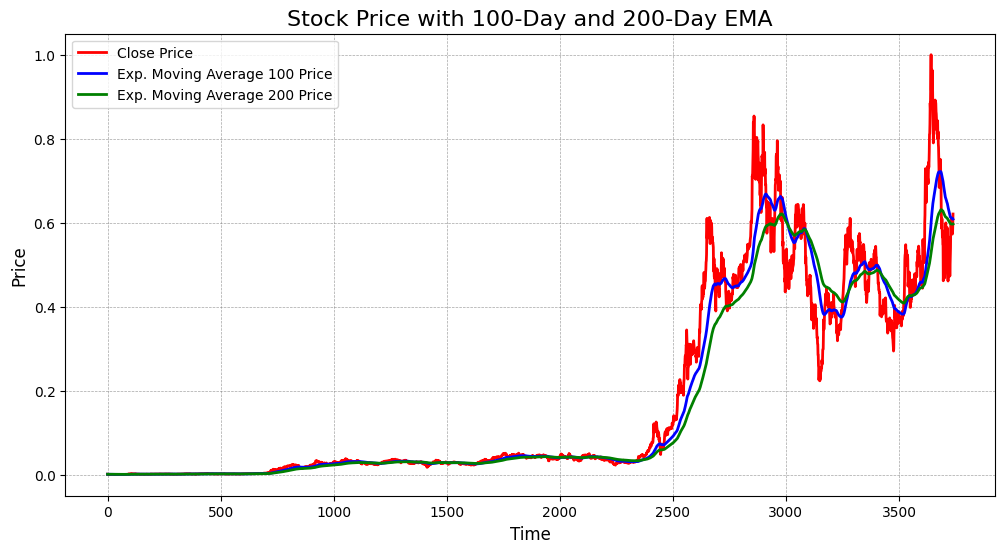

In [75]:
plt.style.use('default')
plt.figure(figsize=(12, 6))

plt.plot(df['Close'], label='Close Price', color='red', linewidth=2)
plt.plot(ema100, label='Exp. Moving Average 100 Price', color='blue', linewidth=2)
plt.plot(ema200, label='Exp. Moving Average 200 Price', color='green', linewidth=2)
plt.title('Stock Price with 100-Day and 200-Day EMA', fontsize=16, color='Black')
plt.xlabel('Time', fontsize=12, color='Black')
plt.ylabel('Price', fontsize=12, color='Black')

plt.legend(fontsize=10, loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

In [59]:
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()

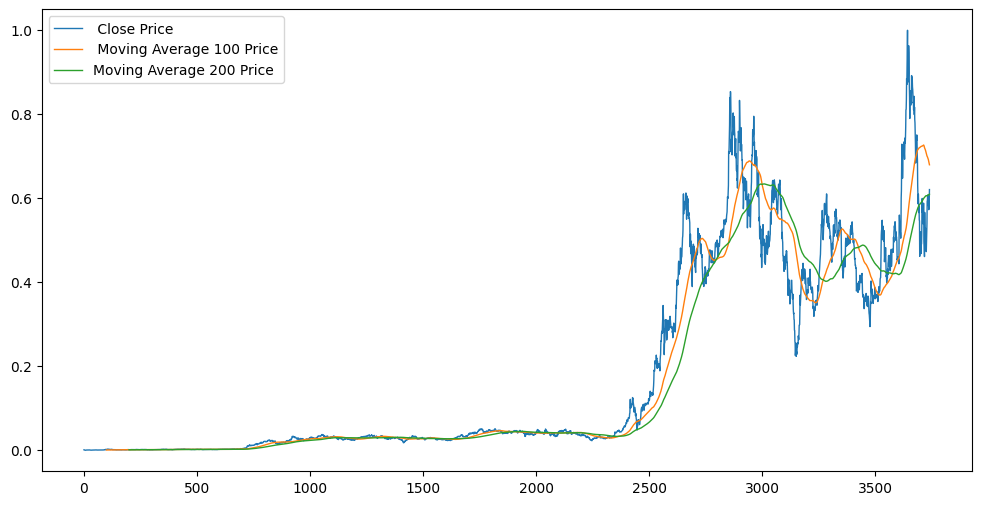

In [60]:
plt.style.use('default')

plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f' Close Price', linewidth = 1)
plt.plot(ma100, label = f' Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

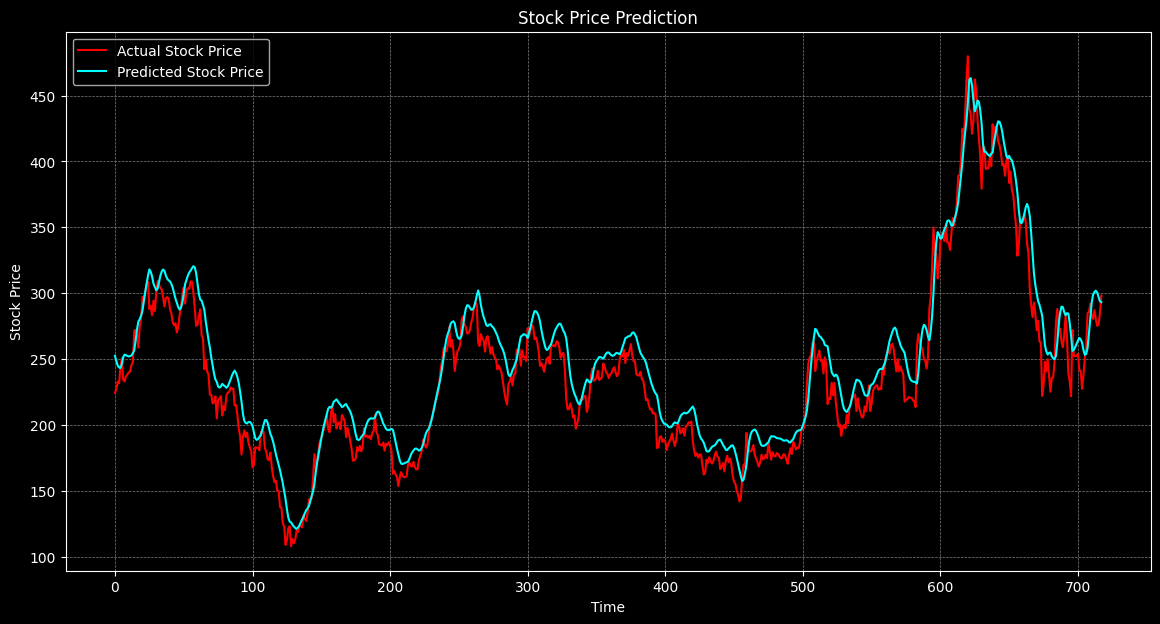

In [76]:
plt.style.use('dark_background')

plt.figure(figsize=(14, 7))
plt.plot(y_test_actual, color='red', label='Actual Stock Price')
plt.plot(predicted_prices, color='cyan', label='Predicted Stock Price')  
plt.title('Stock Price Prediction', color='white')
plt.xlabel('Time', color='white')
plt.ylabel('Stock Price', color='white')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)  
plt.show()

In [77]:
model.save('Stock_lstm_model.h5')

In [63]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

X_train_reshaped = X_train.reshape(X_train.shape[0], -1)  
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)
model1 = XGBRegressor(n_estimators=100, learning_rate=0.2)
model1.fit(X_train_reshaped, y_train)
predictions = model1.predict(X_test_reshaped)

mse = mean_squared_error(y_test, predictions)
print(mse)

0.0016032721132090036


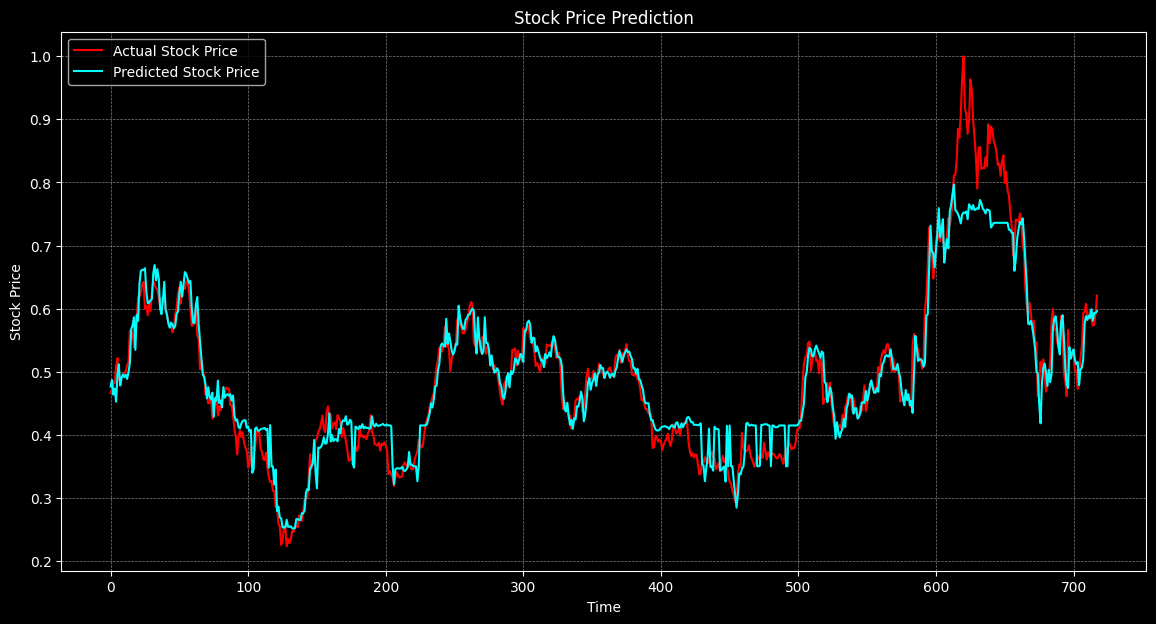

In [64]:
plt.style.use('dark_background')

plt.figure(figsize=(14, 7))
plt.plot(y_test, color='red', label='Actual Stock Price')
plt.plot(predictions, color='cyan', label='Predicted Stock Price')  
plt.title('Stock Price Prediction', color='white')
plt.xlabel('Time', color='white')
plt.ylabel('Stock Price', color='white')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)  
plt.show()